# Keyword Analysis

Use jupyter notebook to conduct interactive data analysis.

Also output crucial files for data visualization on web.

In [1]:
import numpy as np
import pandas as pd
import json
import math
import os
from tqdm import tqdm
import matplotlib.pyplot as plt

class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

customer_csv_path = '../data/csv/aug_customers.csv'
product_csv_path = '../data/csv/products.csv'
comment_csv_path = '../data/csv/aug_comments.csv'
keyword_csv_path = '../data/csv/keywords.csv'

output_base_dir = '../stats/keyword'


In [2]:
keyword_df = pd.read_csv(keyword_csv_path)

print(f'Number of keywords: {len(keyword_df)}')

Number of keywords: 1026557


In [3]:
keyword_df.head()

,word,count
0,crap,28197
1,night,159121
2,glad,131051
3,riveting,16199
4,binge,9922


In [4]:
# sort on keywords
keyword_df.sort_values(by=['count'], ascending=False, inplace=True)
keyword_df = keyword_df.reset_index(drop=True)

keyword_df.head(20)

,word,count
0,movie,4717681
1,great,2426195
2,good,2145206
3,film,2003701
4,story,1275781
5,time,1237581
6,dvd,1235672
7,series,974883
8,movies,885986
9,show,854735


In [5]:
keyword_df.describe()

,count
count,1.026557e+06
mean,1.684545e+02
std,7.804254e+03
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,4.717681e+06


In [7]:
count_sum = keyword_df['count'].sum()

word_occurence_stat = []

for power in range(0, 6):
    thres = int(math.pow(10, power))
    keyword_subset_df = keyword_df[keyword_df["count"] >= thres]
    subset_sum = keyword_subset_df['count'].sum()
    num_words = len(keyword_subset_df)
    print(f'{num_words} words appeared >= {thres} times, {100*num_words/len(keyword_df):.2f}% words accounts for {100*subset_sum/count_sum:.2f}% occurence')
    word_occurence_stat.append({
        'threshold': thres,
        'numWords': num_words,
        'totalOccurence': subset_sum,
    })

1026557 words appeared >= 1 times, 100.00% words accounts for 100.00% occurence
134471 words appeared >= 10 times, 13.10% words accounts for 99.05% occurence
40948 words appeared >= 100 times, 3.99% words accounts for 97.42% occurence
12256 words appeared >= 1000 times, 1.19% words accounts for 92.07% occurence
2444 words appeared >= 10000 times, 0.24% words accounts for 74.76% occurence
236 words appeared >= 100000 times, 0.02% words accounts for 40.13% occurence


Here we can see that, a more extreme version of 80/20 rule appeared for keyword occurence, where 13% of the vocabulary accounted for more than 99% of total occurence.

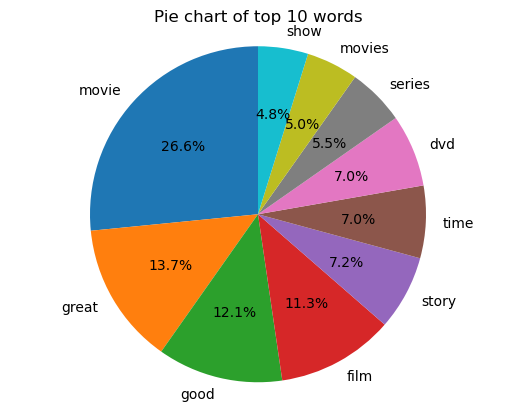

In [8]:
# draw a pie chart with top 10 words

top_10_keywords = keyword_df.head(10)
sizes = list(top_10_keywords['count'])  # Sizes of each slice
labels = list(top_10_keywords['word'])  # Labels for each slice
# colors = ['red', 'orange', 'yellow', 'green', 'blue']  # Colors for each slice

# add other words
# sizes.append(other_words_count)
# labels.append('other words')


# Create the pie chart
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
plt.axis('equal')  # Ensure that the pie is drawn as a circle
plt.title('Pie chart of top 10 words')

# Display the chart
plt.show()

In [9]:
selected_words_stat = []
for word in ['good', 'great', 'best', 'funny', 'interesting', 'bad', 'terrible', 'worst', 'boring', 'disappointing']:
    rank = keyword_df.index[keyword_df['word']==word].tolist()[0]+1
    occurence = keyword_df[keyword_df['word']==word].iloc[0]['count']
    print(f"'{word}' occured {occurence} times, ranked #{rank}/{len(keyword_df)}")
    selected_words_stat.append({
        'word': word,
        'rank': int(rank),
        'occurence': int(occurence),
    })
print()

'good' occured 2145206 times, ranked #3/1026557
'great' occured 2426195 times, ranked #2/1026557
'best' occured 726102 times, ranked #13/1026557
'funny' occured 454117 times, ranked #28/1026557
'interesting' occured 352049 times, ranked #46/1026557
'bad' occured 473861 times, ranked #25/1026557
'terrible' occured 90256 times, ranked #259/1026557
'worst' occured 84886 times, ranked #279/1026557
'boring' occured 117811 times, ranked #197/1026557
'disappointing' occured 40754 times, ranked #636/1026557



Here we can see positive words occured much more then negative words. We may infer that more comments were positive. This could be double checked in sentiment analysis.

In [10]:
# get top 100 words for word cloud
top_100_stat = []
for i in range(100):
    word_ds = keyword_df.iloc[i]
    top_100_stat.append({
        'word': word_ds['word'],
        'occurence': int(word_ds['count']),
        'rank': i+1
    })

In [11]:
# output
with open(os.path.join(output_base_dir, 'occurence.json'), 'w') as f:
    json.dump(word_occurence_stat, f, cls=NpEncoder)
with open(os.path.join(output_base_dir, 'top100.json'), 'w') as f:
    json.dump(top_100_stat, f, cls=NpEncoder)
with open(os.path.join(output_base_dir, 'selected_words.json'), 'w') as f:
    json.dump(selected_words_stat, f, cls=NpEncoder)